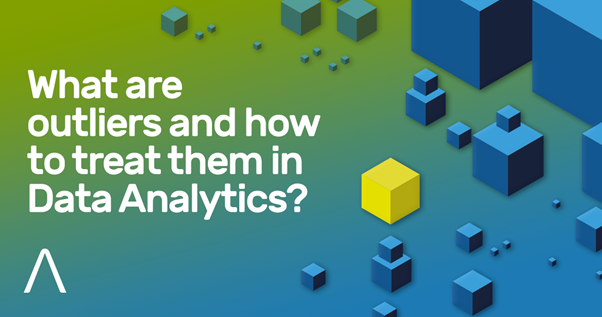

### **What are Outliers?**

---



They are data records that differ dramatically from all others, they distinguish themselves in one or more characteristics. In other words, an outlier is a value that escapes normality and can (and probably will) cause anomalies in the results obtained through algorithms and analytical systems. The presence of outliers in a classification or regression dataset can result in a **poor fit** and **lower predictive modeling performance.**


Some other names of Outliers are: Aberration, oddity, deviation, anomaly, eccentric, nonconformist, exception, irregularity, dissent, etc.



### Different types of **Outliers**


---
1. Point outliers
2. Contextual outliers
3. Collective outliers

***Point outliers*** are single data points that lay far from the rest of the distribution. ***Contextual outliers*** can be noise in data, such as punctuation symbols when realizing text analysis or background noise signal when doing speech recognition. ***Collective outliers*** can be subsets of novelties in data such as a signal that may indicate the discovery of new phenomena



### **Common causes of outliers on a data set**


---

1.	Data entry errors (human errors)
2.  Measurement errors (instrument errors)
3.	Experimental errors (data extraction or experiment planning/executing errors)
4.  Intentional (dummy outliers made to test detection methods)
5.  Data processing errors (data manipulation or data set unintended mutations)
6.	Sampling errors (extracting or mixing data from wrong or various sources)
7. 	Natural (not an error, novelties in data)





### [**Outlier Analysis**](https://amzn.to/3112NzL)

---

In the book Outlier Analysis, Author Aggarwal provides a useful taxonomy of outlier detection methods, as follows:

1.	Extreme Value Analysis: Determine the statistical tails of the underlying distribution of the data. For example, statistical methods like the z-scores on univariate data.
2. Probabilistic and Statistical Models: Determine unlikely instances from a probabilistic model of the data. For example, gaussian mixture models optimized using expectation-maximization.
3.	Linear Models: Projection methods that model the data into lower dimensions using linear correlations. For example, principal component analysis and data with large residual errors may be outliers.
4.	Proximity-based Models: Data instances that are isolated from the mass of the data as determined by cluster, density or nearest neighbor analysis.
5.	Information Theoretic Models: Outliers are detected as data instances that increase the complexity (minimum code length) of the dataset.
6. High-Dimensional Outlier Detection: Methods that search subspaces for outliers give the breakdown of distance-based measures in higher dimensions (curse of dimensionality).




###**Baseline Model Performance**


---


House Price Regression Dataset
We will use the house price regression dataset.

This dataset has 13 input variables that describe the properties of the house and suburb and requires the prediction of the median value of houses in the suburb in thousands of dollars.

One can learn more about the dataset here:

1. [House Price Dataset (housing.csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv)
2. [House Price Dataset Description (housing.names)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names)

The dataset has many numerical input variables that have unknown and complex relationships. We don’t know that outliers exist in this dataset, although we may guess that some outliers may be present.



---



---



The example below loads the dataset and splits it into the input and output columns, splits it into train and test datasets, then summarizes the shapes of the data arrays.

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Running the example, we can see that the dataset was loaded correctly and that there are 506 rows of data with 13 input variables and a single target variable.

The dataset is split into train and test sets with 339 rows used for model training and 167 for model evaluation.

In [ ]:
(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)

let’s evaluate a model on this dataset and establish a baseline in performance.


---



---




It is a regression predictive modeling problem, meaning that we will be predicting a numeric value. All input variables are also numeric.

In this case, we will fit a linear regression algorithm and evaluate model performance by training the model on the test dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE).

The complete example of evaluating a linear regression model on the dataset is listed below.

In [ ]:
# evaluate model on the raw dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Running the example fits and evaluates the model, then reports the MAE.

In [ ]:
MAE: 3.417



---



---



### [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.

Perhaps the most important hyperparameter in the model is the “contamination” argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.


In [ ]:
# evaluate model performance with outliers removed using isolation forest
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Running the example fits and evaluates the model, then reports the MAE.

In [ ]:
(339, 13) (339,)
(305, 13) (305,)
MAE: 3.189

In this case, we can see that that model identified and removed 34 outliers and achieved a MAE of about 3.189, an improvement over the baseline that achieved a score of about 3.417.



---



---



## [Minimum Covariance Determinant](http://scikit-learn.org/stable/modules/generated/sklearn.covariance.MinCovDet.html)

It provides the “contamination” argument that defines the expected ratio of outliers to be observed in practice. In this case, we will set it to a value of 0.01, found with a little trial and error.


In [ ]:
# evaluate model performance with outliers removed using elliptical envelope
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Running the example fits and evaluates the model, then reports the MAE.

In [ ]:
(339, 13) (339,)
(335, 13) (335,)
MAE: 3.388

In this case, we can see that the elliptical envelope method identified and removed only 4 outliers, resulting in a drop in MAE from 3.417 with the baseline to 3.388.



---



---



## [Local Outlier Factor](http://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#:~:text=The%20Local%20Outlier%20Factor%20(LOF,lower%20density%20than%20their%20neighbors.)

This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality.

The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers.


In [ ]:
# evaluate model performance with outliers removed using local outlier factor
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Running the example fits and evaluates the model, then reports the MAE.

In [ ]:
(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356

In this case, we can see that the local outlier factor method identified and removed 34 outliers, the same number as isolation forest, resulting in a drop in MAE from 3.417 with the baseline to 3.356. Better, but not as good as isolation forest, suggesting a different set of outliers were identified and removed.




---



---



### [One-Class SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html)

The support vector machine, or SVM, algorithm developed initially for binary classification can be used for one-class classification.

When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers. This modification of SVM is referred to as One-Class SVM.



In [ ]:
# evaluate model performance with outliers removed using one class SVM
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Running the example fits and evaluates the model, then reports the MAE.

In [ ]:
(339, 13) (339,)
(336, 13) (336,)
MAE: 3.431

In this case, we can see that only three outliers were identified and removed and the model achieved a MAE of about 3.431, which is not better than the baseline model that achieved 3.417. Perhaps better performance can be achieved with more tuning.



---



---



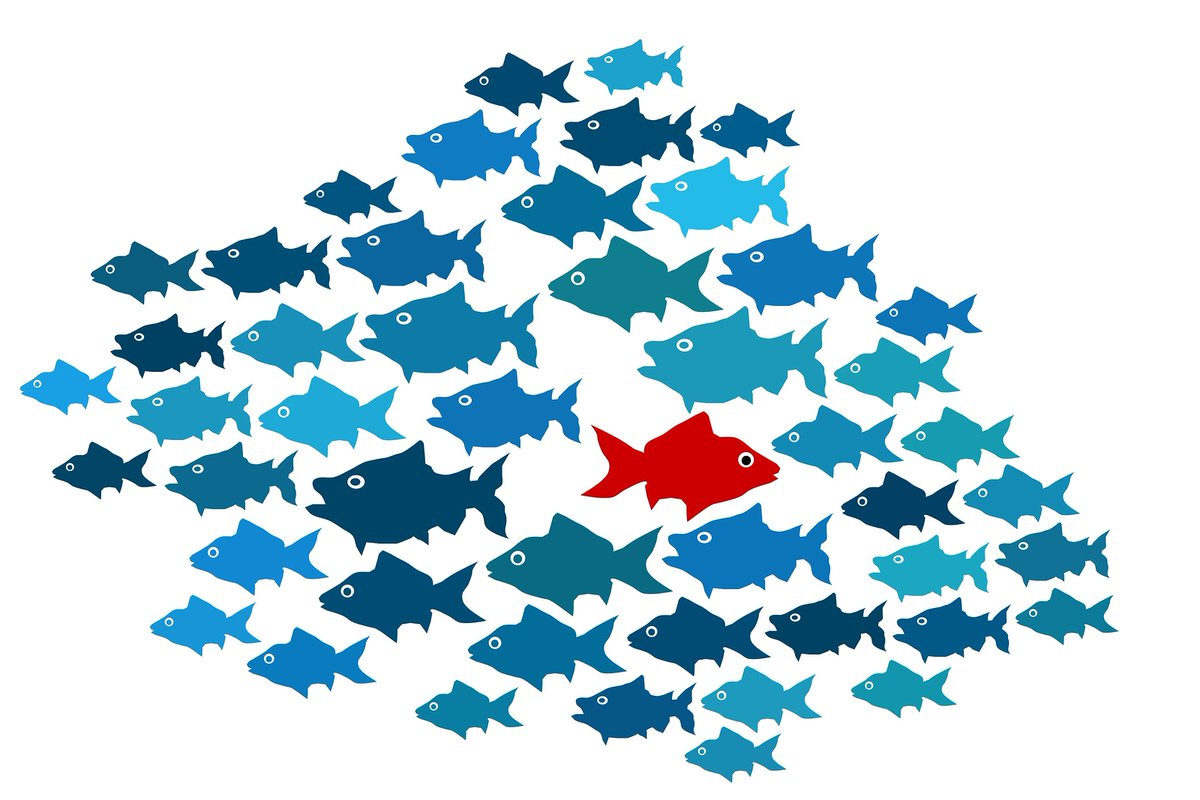